In [1]:
zip_path = '/content/drive/My\ Drive/Dataset/Neural\ Data/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

Tunning : Connv2D filter 64, kernel_size = 3x3, AveragePooling2D, batch_size = 256, epochs = 50, learning rate=0.01

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
# https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(AveragePooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
average_pooling2d (AveragePo (None, 100, 100, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 640000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               81920128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 81,922,049
Trainable params: 81,922,049
Non-trainable params: 0
_________________________________________________________________


In [5]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)
# train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=256, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=256, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [6]:
history_model_tunning1 = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
50/50 [==============================] - 48s 963ms/step - loss: 1.3159 - accuracy: 0.5855 - val_loss: 0.6481 - val_accuracy: 0.6412
Epoch 2/50
50/50 [==============================] - 48s 953ms/step - loss: 0.6292 - accuracy: 0.6497 - val_loss: 0.6226 - val_accuracy: 0.6514
Epoch 3/50
50/50 [==============================] - 48s 953ms/step - loss: 0.5878 - accuracy: 0.6979 - val_loss: 0.5753 - val_accuracy: 0.6936
Epoch 4/50
50/50 [==============================] - 48s 952ms/step - loss: 0.5414 - accuracy: 0.7295 - val_loss: 0.5716 - val_accuracy: 0.6980
Epoch 5/50
50/50 [==============================] - 48s 953ms/step - loss: 0.4964 - accuracy: 0.7587 - val_loss: 0.5406 - val_accuracy: 0.7318
Epoch 6/50
50/50 [==============================] - 48s 958ms/step - loss: 0.4472 - accuracy: 0.7925 - val_loss: 0.5413 - val_accuracy: 0.7158
Epoch 7/50
50/50 [==============================] - 48s 953ms/step

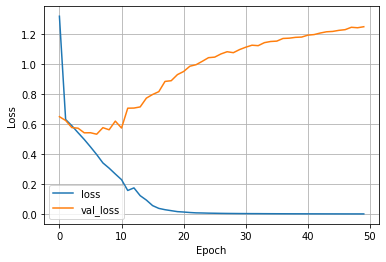

In [7]:
plot_loss(history_model_tunning1)

Epoch 11/50 -- val_loss: 0.5724 - val_accuracy: 0.7393

nilai loss terkecil dan akurasi tertinggi untuk validation saya dapatkan pada epoch 11, dari grafik juga dapat dilihat pada saat epochnya 11 grafik loss mulai stabil naik
nilai akurasi yang didapatkan menggunakan AveragePooling tidak jauh berbeda dengan MaxPooling. namun disini saya langsung menggunakan filter layer 64.